#Code for predicting the compressive strength of cement using regression model


In [13]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [14]:
#import Dataset

cement = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Concrete%20Compressive%20Strength.csv')

In [15]:
#View Data

cement.head()

,Cement (kg in a m^3 mixture),Blast Furnace Slag (kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate (kg in a m^3 mixture),Age (day),"Concrete Compressive Strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [19]:
cement = cement.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

In [20]:
#Information of Dataset

cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Cement (kg in a m^3 mixture)                      1030 non-null   float64
 1   Blast Furnace Slag (kg in a m^3 mixture)          1030 non-null   float64
 2   Fly Ash (kg in a m^3 mixture)                     1030 non-null   float64
 3   Water (kg in a m^3 mixture)                       1030 non-null   float64
 4   Superplasticizer (kg in a m^3 mixture)            1030 non-null   float64
 5   Coarse Aggregate (kg in a m^3 mixture)            1030 non-null   float64
 6   Fine Aggregate (kg in a m^3 mixture)              1030 non-null   float64
 7   age                                               1030 non-null   int64  
 8   Concrete Compressive Strength(MPa, megapascals)   1030 non-null   float64
dtypes: float64(8), int64

In [21]:
#Summary statistics of Dataset

cement.describe()

,Cement (kg in a m^3 mixture),Blast Furnace Slag (kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate (kg in a m^3 mixture),age,"Concrete Compressive Strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [22]:
# check for missing value

cement.isna().sum()

Cement (kg in a m^3 mixture)                        0
Blast Furnace Slag (kg in a m^3 mixture)            0
Fly Ash (kg in a m^3 mixture)                       0
Water (kg in a m^3 mixture)                         0
Superplasticizer (kg in a m^3 mixture)              0
Coarse Aggregate (kg in a m^3 mixture)              0
Fine Aggregate (kg in a m^3 mixture)                0
age                                                 0
Concrete Compressive Strength(MPa, megapascals)     0
dtype: int64

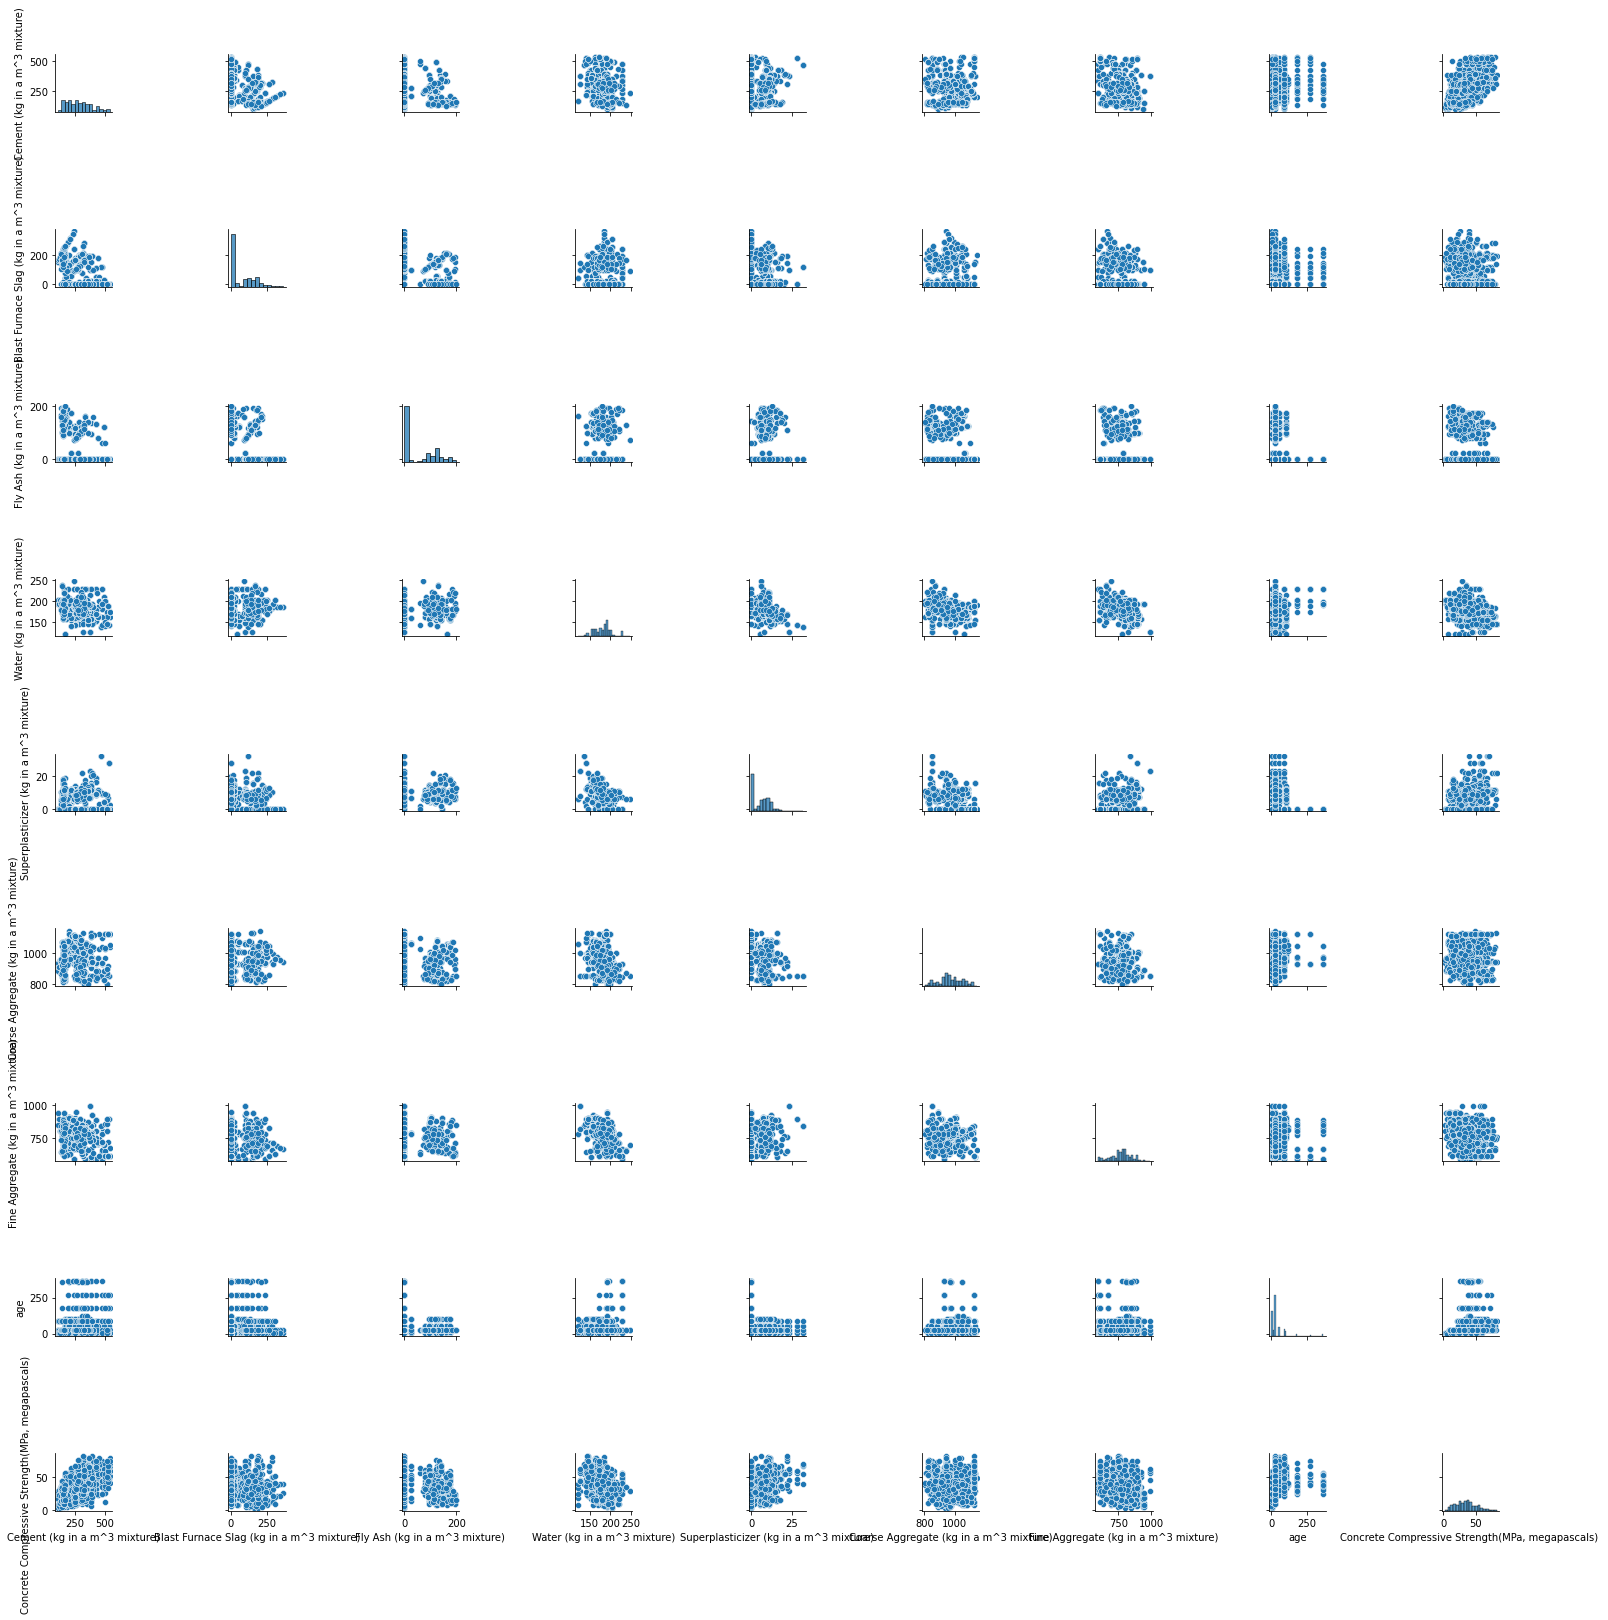

In [23]:
#checking for missing values

sns.pairplot(cement)

In [24]:
# columns name

cement.columns

Index(['Cement (kg in a m^3 mixture)',
       'Blast Furnace Slag (kg in a m^3 mixture)',
       'Fly Ash (kg in a m^3 mixture)', 'Water (kg in a m^3 mixture)',
       'Superplasticizer (kg in a m^3 mixture)',
       'Coarse Aggregate (kg in a m^3 mixture)',
       'Fine Aggregate (kg in a m^3 mixture)', 'age',
       'Concrete Compressive Strength(MPa, megapascals) '],
      dtype='object')

In [25]:
# defining y

y = cement['Concrete Compressive Strength(MPa, megapascals) ']

In [28]:
# defining x
x = cement[['Blast Furnace Slag (kg in a m^3 mixture)',
       'Fly Ash (kg in a m^3 mixture)',
       'Water (kg in a m^3 mixture)',
       'Superplasticizer (kg in a m^3 mixture)',
       'Coarse Aggregate (kg in a m^3 mixture)',
       'Fine Aggregate (kg in a m^3 mixture)', 
       'age']]

In [30]:
# splitting data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [31]:
# verifing shape

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((721, 7), (309, 7), (721,), (309,))

In [32]:
# model selection

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
# Model Training

model.fit(x_train,y_train)

LinearRegression()

In [34]:
# predicting with model

y_pred = model.predict(x_test)

In [35]:
# model evaluation

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [37]:
# model MAE

print('The Mean Absolute Error is : ',mean_absolute_error(y_test,y_pred))

The Mean Absolute Error is :  9.835914603632034


In [38]:
# model MAPE

print('The Mean Absolute percentage Error is : ',mean_absolute_percentage_error(y_test,y_pred))

The Mean Absolute percentage Error is :  0.36403083996230434


In [39]:
# model MSE

print('The Mean Squared Error is : ',mean_squared_error(y_test,y_pred))

The Mean Squared Error is :  150.1323598922048
